[View in Colaboratory](https://colab.research.google.com/github/shaeli1996/Household_power_consumption/blob/master/Arima_daily.ipynb)

In [0]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
!unzip -q household_power_consumption.zip

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
%matplotlib inline
#
df = pd.read_csv('household_power_consumption.txt',sep=';')
#
df['TimeStamp'] = df['Date']+' '+df['Time']
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'],format = "%d/%m/%Y %H:%M:%S")
df.index = df['TimeStamp']
df.index.name = None
df = df.drop(['Date','Time'],axis = 1)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,TimeStamp
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [3]:
#@title Default title text
df = df.convert_objects(convert_numeric=True)
df = df.ffill()
#
newdf = df[['Global_active_power']]
newdf.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


,Global_active_power
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666


In [0]:
df_daily = pd.DataFrame(newdf.Global_active_power.resample('d').sum())

In [5]:
df_daily.head()

,Global_active_power
2006-12-16,1209.176
2006-12-17,3390.460
2006-12-18,2203.826
2006-12-19,1666.194
2006-12-20,2225.748


In [6]:
df_daily.shape

(1442, 1)

In [7]:
type(df_daily)

pandas.core.frame.DataFrame

In [8]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1442 entries, 2006-12-16 to 2010-11-26
Freq: D
Data columns (total 1 columns):
Global_active_power    1442 non-null float64
dtypes: float64(1)
memory usage: 22.5 KB


In [9]:
df_daily.describe()

,Global_active_power
count,1442.000000
mean,1563.162724
std,603.833832
min,210.240000
25%,1166.661500
50%,1542.486000
75%,1893.959000
max,4773.386000


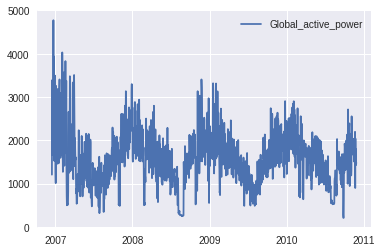

In [10]:
df_daily.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0235a3a90>]],
      dtype=object)

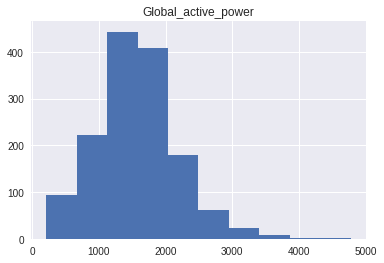

In [11]:
df_daily.hist()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


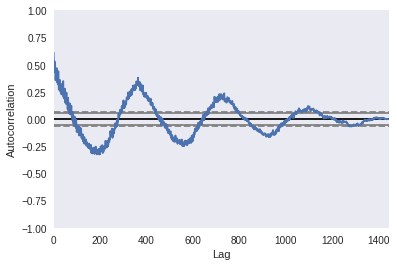

In [12]:
autocorrelation_plot(df_daily)

In [13]:
#comparison of mean and variance by splitting in two parts
X = df_daily.values
split = len(X)//2
X1, X2 = X[0:split],X[split:]
mean1,mean2 = X1.mean(),X2.mean()
var1,var2 = X1.var(),X2.var()
print("mean1 = %f , mean2 = %f"%(mean1,mean2))
print("var1 = %f , var2 = %f"%(var1,var2))

mean1 = 1586.269229 , mean2 = 1540.056219
var1 = 461000.281161 , var2 = 266656.783069


In [14]:
#comparison of mean and variance by splitting in three parts
X = df_daily.values
split = len(X)//3
X1,X2,X3 = X[0:split],X[split:2*split],X[2*split:]
print(X1.shape)
print(X2.shape)
print(X3.shape)
mean1,mean2,mean3 = X1.mean(),X2.mean(),X3.mean()
var1,var2,var3 = X1.var(),X2.var(),X3.var()
print("mean1 = %f , mean2 = %f , mean3 = %f"%(mean1,mean2,mean3))
print("var1 = %f , var2 = %f , var3 = %f"%(var1,var2,var3))

(480, 1)
(480, 1)
(482, 1)
mean1 = 1689.807383 , mean2 = 1470.886679 , mean3 = 1528.936718
var1 = 486319.788623 , var2 = 328638.038413 , var3 = 252864.039091


In [15]:
#comparison of mean and variance by splitting in four parts
X = df_daily.values
split = len(X)//4
X1,X2,X3,X4 = X[0:split],X[split:2*split],X[2*split:3*split],X[3*split:]
print(X1.shape)
print(X2.shape)
print(X3.shape)
print(X4.shape)
mean1,mean2,mean3,mean4 = X1.mean(),X2.mean(),X3.mean(),X4.mean()
var1,var2,var3,var4 = X1.var(),X2.var(),X3.var(),X4.var()
print("mean1 = %f , mean2 = %f , mean3 = %f , mean4 = %f"%(mean1,mean2,mean3,mean4))
print("var1 = %f , var2 = %f , var3 = %f , var4 = %f"%(var1,var2,var3,var4))

(360, 1)
(360, 1)
(360, 1)
(362, 1)
mean1 = 1601.446694 , mean2 = 1569.779683 , mean3 = 1530.857450 , mean4 = 1550.636657
var1 = 527146.185561 , var2 = 395012.913187 , var3 = 276684.790267 , var4 = 256494.297888


In [0]:
X = df_daily['Global_active_power'].values

In [17]:
print(X)

[1209.176 3390.46  2203.826 ... 1796.248 1431.164 1488.104]


In [18]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
result = adfuller(X, maxlag=None, autolag='BIC', regression='c')

In [20]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.131210
p-value: 0.000860
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [0]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [0]:
def evaluate_ARIMA_model(df,ratio,ordr):
  X = df[['Global_active_power']].values
  #normalize here
  X = X.reshape(len(X),1)
  scaler = MinMaxScaler(feature_range = (0,1))
  scaler = scaler.fit(X)
  X = scaler.transform(X)
#   X = X.values
  #normalize finsih
  split = int((X.shape[0])*ratio)
  train = X[:split]
  test = X[split:]
  print(train.shape)
  print(test.shape)
  #
  history = [x for x in train]
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history,order=ordr)
    model_fit = model.fit(disp = 0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
  error = mean_squared_error(test,predictions)
  print("ARIMA(",ordr,") error = ",error)
#   predictions = predictions.reshape(len(predictions),1)
  predictions = scaler.inverse_transform(predictions)
  test = scaler.inverse_transform(test)
#   predictions = predictions.values
  return (error,test,predictions)

In [0]:
def parameter_tuning(df,p_max,d_max,q_max):
  best_error=9999999999
  for i in range(p_max):
    for j in range(d_max):
      for k in range(q_max):
        order = (i,j,k)
        val = evaluate_ARIMA_model(df,0.7,order)
        if(val[0]<best_error):
          best_error = val[0]
          best_test = val[1]
          best_predictions = val[2]
          best_order = order
  print("best order = ",best_order)
  return (best_error,best_test,best_predictions,best_order)

In [28]:
ans = parameter_tuning(df_daily,2,2,1)

(1009, 1)
(433, 1)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

ARIMA( (0, 0, 0) ) error =  0.01171916295155605
(1009, 1)
(433, 1)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

ARIMA( (0, 1, 0) ) error =  0.009834739368403874
(1009, 1)
(433, 1)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceW

ARIMA( (1, 0, 0) ) error =  0.007780658636070295
(1009, 1)
(433, 1)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA( (1, 1, 0) ) error =  0.00847056032160667
best order =  (1, 0, 0)


In [29]:
print("Mean Square Error = %f"%(ans[0]))

Mean Square Error = 0.007781


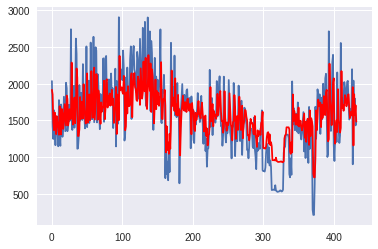

In [30]:
plt.plot(ans[1])
plt.plot(ans[2],'r')
plt.legend
plt.show()

(70, 1)
(30, 1)
ARIMA( (0, 0, 0) ) error =  0.057620987178068614
(70, 1)
(30, 1)


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA( (0, 1, 0) ) error =  0.028839010134984886
(70, 1)
(30, 1)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


ARIMA( (1, 0, 0) ) error =  0.04670673781491132
(70, 1)
(30, 1)
ARIMA( (1, 1, 0) ) error =  0.03282358403876298
best order =  (0, 1, 0)


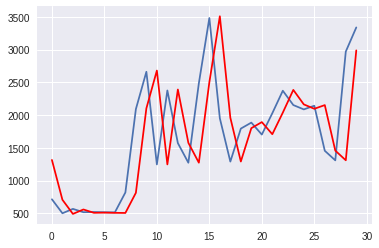

In [31]:
#graph for first 100 days
anstp = ans = parameter_tuning(df_daily[:100],2,2,1)
plt.plot(ans[1])
plt.plot(ans[2],'r')
plt.legend
plt.show()